In [1]:
# Personalized Learning Model for Neurodivergent Students 
# Exploratory Data Analysis  

# Carly Carroll

In [8]:
##### LOAD LIBRARIES ##### 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##### LOAD CSV FILES #####

courses = pd.read_csv("courses_clean.csv")
assessments = pd.read_csv("assessments_clean.csv")
vle = pd.read_csv("vle_clean.csv")
student_mental_health = pd.read_csv("student_mental_health_clean.csv")
student_mat_por = pd.read_csv("student_mat_por_clean.csv")
engagement_profile = pd.read_csv("engagement_profile_clean.csv")

In [4]:
##### PREVIEW DATA #####

print("Courses\n", courses.head(), "\n")
print("Assessments\n", assessments.head(), "\n")
print("VLE\n", vle.head(), "\n")
print("Student Mental Health\n", student_mental_health.head(), "\n")
print("Student Mat-Por\n", student_mat_por.head(), "\n")
print("Engagement Profile\n", engagement_profile.head(), "\n")

Courses
   code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240 

Assessments
   code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0 

VLE
    id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN 

In [5]:
##### DATASET INFO #####

print(courses.info())
print(assessments.info())
print(vle.info())
print(student_mental_health.info())
print(student_mat_por.info())
print(engagement_profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        195 non-null    object 
 1   code_presentation  195 non-null    object 
 2   id_assessment      195 non-null    int64  
 3   assessment_type    195 non-null    object 
 4   date               195 non-null    float64
 5   weight             195 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.3+ KB
None
<cl

In [6]:
##### SUMMARY STATISTICS #####

print(courses.describe(include='all'))
print(assessments.describe(include='all'))
print(vle.describe(include='all'))
print(student_mental_health.describe(include='all'))
print(student_mat_por.describe(include='all'))
print(engagement_profile.describe(include='all'))

       code_module code_presentation  module_presentation_length
count           22                22                   22.000000
unique           7                 4                         NaN
top            BBB             2014J                         NaN
freq             4                 7                         NaN
mean           NaN               NaN                  255.545455
std            NaN               NaN                   13.654677
min            NaN               NaN                  234.000000
25%            NaN               NaN                  241.000000
50%            NaN               NaN                  261.500000
75%            NaN               NaN                  268.000000
max            NaN               NaN                  269.000000
       code_module code_presentation  id_assessment assessment_type  \
count          195               195     195.000000             195   
unique           7                 4            NaN               3   
top    

       code_module code_presentation    id_student    gender    region  \
count     94154589          94154589  9.415459e+07  94154589  94154589   
unique           7                 4           NaN         2        13   
top            FFF             2014J           NaN         M  Scotland   
freq      42560863          28907489           NaN  60470808  10978132   
mean           NaN               NaN  7.251716e+05       NaN       NaN   
std            NaN               NaN  5.719630e+05       NaN       NaN   
min            NaN               NaN  6.516000e+03       NaN       NaN   
25%            NaN               NaN  5.092920e+05       NaN       NaN   
50%            NaN               NaN  5.846010e+05       NaN       NaN   
75%            NaN               NaN  6.372060e+05       NaN       NaN   
max            NaN               NaN  2.698588e+06       NaN       NaN   

            highest_education  imd_band  age_band  num_of_prev_attempts  \
count                94154589  88269

In [7]:
##### NULLS AND DUPLICATES #####

# nulls 
print(courses.isnull().sum())
print(assessments.isnull().sum())
print(vle.isnull().sum())
print(student_mental_health.isnull().sum())
print(student_mat_por.isnull().sum())
print(engagement_profile.isnull().sum())

# duplicates
print(courses.duplicated().sum())
print(assessments.duplicated().sum())
print(vle.duplicated().sum())
print(student_mental_health.duplicated().sum())
print(student_mat_por.duplicated().sum())
print(engagement_profile.duplicated().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64
id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
sex     

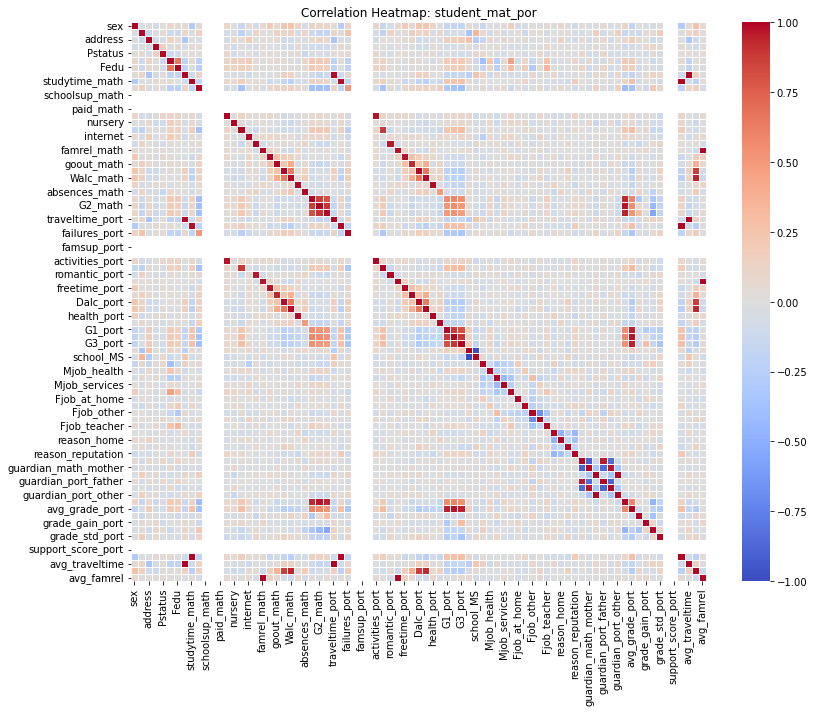

In [9]:
##### CORRELATION HEAT MAP #####

plt.figure(figsize=(12, 10))
corr_matrix = student_mat_por.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: student_mat_por")
plt.tight_layout()
plt.show()

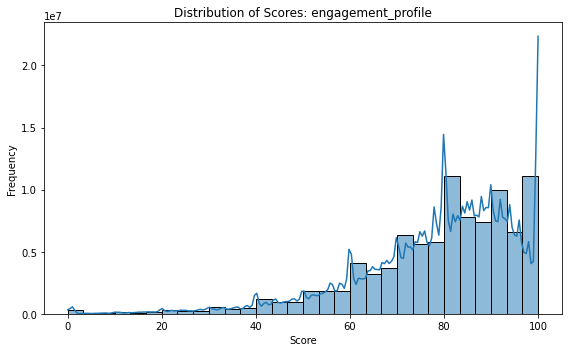

In [11]:
##### FEATURE DISTRIBUTION #####

plt.figure(figsize=(8, 5))
sns.histplot(engagement_profile['score'].dropna(), bins=30, kde=True)
plt.title("Distribution of Scores: engagement_profile")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

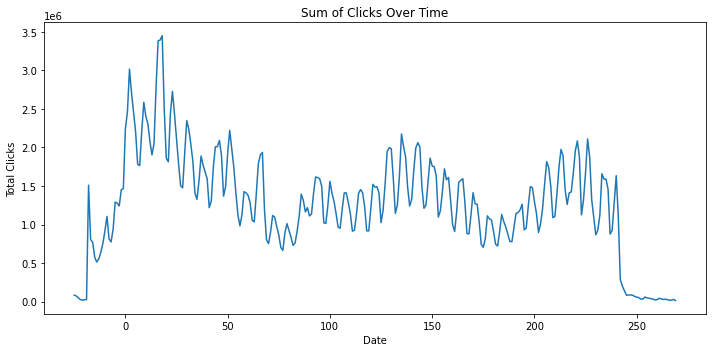

In [12]:
##### TIME TREND #####

time_trend = engagement_profile.groupby('date')['sum_click'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_trend, x='date', y='sum_click')
plt.title("Sum of Clicks Over Time")
plt.xlabel("Date")
plt.ylabel("Total Clicks")
plt.tight_layout()
plt.show()

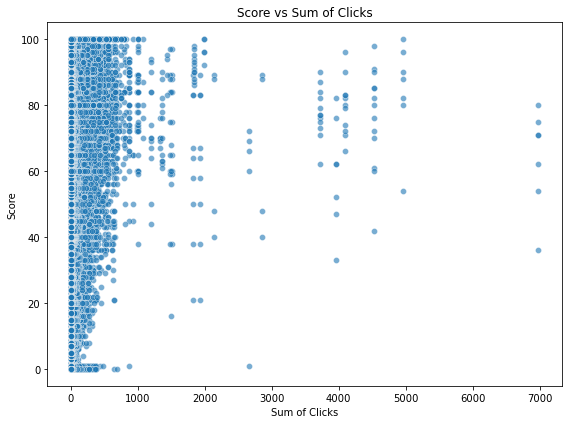

In [13]:
##### SCATTERPLOT #####

plt.figure(figsize=(8, 6))
sns.scatterplot(data=engagement_profile, x='sum_click', y='score', alpha=0.6)
plt.title("Score vs Sum of Clicks")
plt.xlabel("Sum of Clicks")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

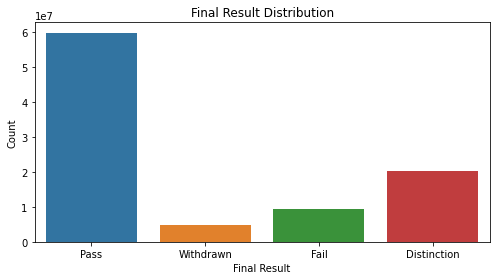

In [14]:
##### FINAL RESULT DISTRIBUTION #####

plt.figure(figsize=(7, 4))
sns.countplot(x='final_result', data=engagement_profile)
plt.title("Final Result Distribution")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

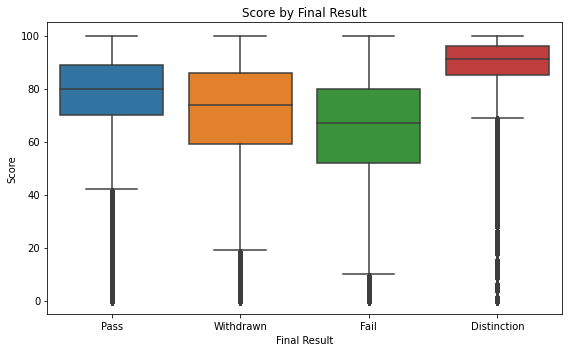

In [15]:
##### SCORE BY FINAL RESULT #####

plt.figure(figsize=(8, 5))
sns.boxplot(x='final_result', y='score', data=engagement_profile)
plt.title("Score by Final Result")
plt.xlabel("Final Result")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

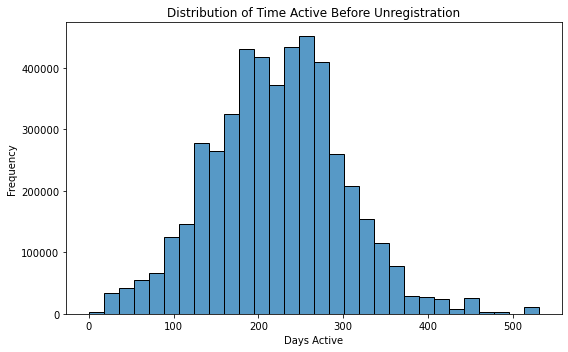

In [16]:
##### TIME ACTIVE BEFORE UNREGISTRATION #####

engagement_profile['time_active'] = engagement_profile['date_unregistration'] - engagement_profile['date_registration']

plt.figure(figsize=(8, 5))
sns.histplot(engagement_profile['time_active'].dropna(), bins=30)
plt.title("Distribution of Time Active Before Unregistration")
plt.xlabel("Days Active")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()